利用线性回归预测房价

1.定义问题
1.1导入类库

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

1.2导入数据集

In [2]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRIATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filename,names=names,delim_whitespace=True)

2.理解数据
2.1对导入的数据进行分析，便于构建合适的模型，比如：查看数据的维度、属性的字段类型、数据本身

In [3]:
print(data.shape)
print(data.dtypes)
#查看数据前30行的元素
print(data.head(30))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRIATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.5

In [4]:
#查看数据的统计属性
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PRIATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
#查看关联关系
print(data.corr(method='pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PRIATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

2.2数据可视化

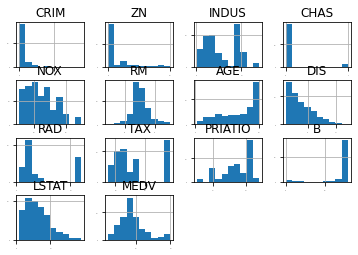

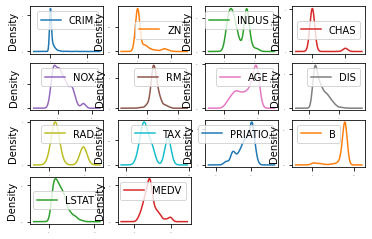

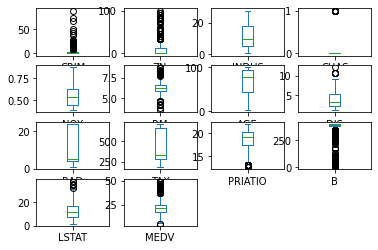

In [6]:
##单一特征图表

#直方图
data.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

#密度图
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,fontsize=1)
plt.show()

#箱线图
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

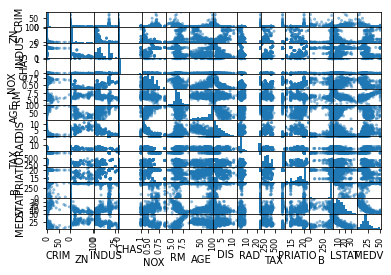

In [7]:
##多重数据图表

#散点图
scatter_matrix(data)
plt.show()
#相关矩阵图

3划分训练集合测试集
3.180%的训练集，20%的测试集

In [8]:
#将实验数据转化为结构化数据
def Merge(data,col):
    """
    这是生成DataFrame的函数：
    param data:输入数据
    param col:列名称数组
    """
    Data = np.array(data).T 
    return pd.DataFrame(Data,columns=col)

In [9]:
#取第6列：房间数作为特征值
InputData = np.array(data)[:,5]
Result = np.array(data)[:,-1]
#保存原始数据集
Data = Merge([InputData,Result],['平均房间数','房价'])
Data.to_csv('原始数据.csv')
#改变数据集和真实房价数组的形状
InputData = InputData.reshape([len(InputData),1])
Result = Result.reshape([len(Result),1])

#将数据集分为训练集合测试集
validation_size = 0.2
seed = 50
train_data,test_data,train_result,test_result = train_test_split(InputData,Result,test_size=validation_size,random_state=seed)

3.2数据可视化

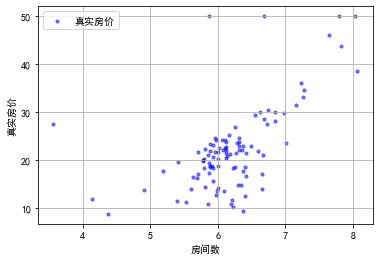

In [10]:
#解决matplotlib中的中文乱码问题
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

#散点图
col = ['真实房价']
plt.scatter(test_data,test_result,alpha=0.5,c='b',s=10)
plt.grid(True)
plt.legend(labels=col,loc='best')
plt.xlabel('房间数')
plt.ylabel('真实房价')
plt.show()
plt.close()

4.实现线性回归类

In [11]:
  #线性回归的类的定义
class LinearRegression(object):

    def __init__(self,input_data,realresult,theta=None):
        """
        这是线性回归的构造函数
        input_data:输入数据
        realresult:真实数据
        theta:线性回归的参数，默认为None
        """
        #获得输入数据集的形状
        row,col = np.shape(input_data)
        #构造输入数据数组
        self.InputData = [0]*row
        #print("row,col:",self.InputData)
        #给每组输入数据增添常数项1
        for(index,data) in enumerate(input_data):
            Data = [1.0]
            #把input_data拓展到Data内，即把input_data的每一维数据添加到Data
            Data.extend(list(data))
            #print("data:\n",Data)
            self.InputData[index] = Data
            #print("data222:\n",self.InputData)

        self.InputData = np.array(self.InputData)
        #print('________:\n',self.InputData[:20])
        #构造输入数据对应的结果
        self.Result = realresult
        #print('**********:\n',self.Result[:20])
        #参数theta不为None时，利用theta构造模型参数
        if theta is not None:
            self.Theta = theta
        else:
            #随机生成服从标准正态分布的参数
            self.Theta = np.random.normal((col+1,1))
    
    def Cost(self):
        """
        计算损失函数的函数
        """
        predict = self.InputData.dot(self.Theta).T
        cost = predict - self.Result.T
        cost = np.average(cost ** 2)
        return cost
    
    def Shuffle_Sequence(self):
        """
        这是在运行SGD算法或MBGD算法之前，随机打算或原始数据集的函数
        """
        #首先获得训练集规模，然后按照规模生成自然数序列
        length = len(self.InputData)
        random_sequence = list(range(length))
        #利用numpy的随机打乱函数训练数据下标
        random_sequence = np.random.permutation(random_sequence)
        return random_sequence

    def BGD(self,alpha):
        """
        利用BGD算法进行一次迭代调整参数的函数
        alpha:学习率
        """
        #定义梯度增量数组
        gradien_increasment = []
        #对输入的训练数据及其真实结果进行依次遍历
        for(input_data,real_result) in zip(self.InputData,self.Result):
            #计算每组input_data的梯度增量，并将梯度增量放进数组
            g = (real_result - input_data.dot(self.Theta)) * input_data
            gradien_increasment.append(g)
        #按列计算平均梯度增量数组形状
        avg_g = np.average(gradien_increasment,0)
        #改变平均梯度增量数组形状
        avg_g = avg_g.reshape((len(avg_g),1))
        #更新模型参数self.Theta
        self.Theta = self.Theta + alpha * avg_g
    
    def SGD(self,alpha):
        """
        利用SGD算法进行一次迭代调整参数的函数
        :param alpha:学习率
        """
        shuffle_sequence = self.Shuffle_Sequence()
        self.InputData = self.InputData[shuffle_sequence]
        self.Result = self.Result[shuffle_sequence]
        for (input_data,real_result) in zip(self.InputData,self.Result):
            g = (real_result - input_data.dot(self.Theta)) * input_data
            g = g.reshape(len(g),1)
            self.Theta = self.Theta + alpha * g
    
    def MBGD(self,alpha,batch_size):
        """
        利用MBGD算法进行一次迭代调整参数的函数
        :param alpha:学习率
        :param batch_size:小批量样本规模
        """
        shuffle_sequence = self.Shuffle_Sequence()
        self.InputData = self.InputData[shuffle_sequence]
        self.Result = self.Result[shuffle_sequence]
        for start in np.arange(0,len(shuffle_sequence),batch_size):
            end = np.min([start + batch_size,len(shuffle_sequence)])
            mini_batch = shuffle_sequence[start:end]
            Mini_Train_Data = self.InputData[mini_batch]
            Mini_Train_Result = self.Result[mini_batch]
            gradient_increasment = []
            for (data,result) in zip(Mini_Train_Data,Mini_Train_Result):
                g = (result - data.dot(self.Theta)) * data
                gradient_increasment.append(g)
            avg_g = np.average(gradient_increasment,0)
            avg_g = avg_g.reshape((len(avg_g),1))
            self.Theta = self.Theta + alpha * avg_g
    
    def train_BGD(self,iter,alpha):
        """
       利用BGD算法迭代优化的函数
       :param iter:迭代次数
       :param alpha:学习率
       """
       #定义平均训练损失数组，记录每轮迭代的训练数据集的损失 
        Cost = []
        #开始进行迭代训练
        for i in range(iter):
            #利用学习率alpha，结合BGD算法对模型进行训练
            self.BGD(alpha)
            #记录每次迭代的平均训练损失
            Cost.append(self.Cost())
        Cost = np.array(Cost)    
        return Cost

    def train_SGD(self,iter,alpha):
        """
       利用SGD算法迭代优化的函数
       :param iter:迭代次数
       :param alpha:学习率
       """
       #定义平均训练损失数组，记录每轮迭代的训练数据集的损失 
        Cost = []
        #开始进行迭代训练
        for i in range(iter):
            #利用学习率alpha，结合BGD算法对模型进行训练
            self.SGD(alpha)
            #记录每次迭代的平均训练损失
            Cost.append(self.Cost())
        Cost = np.array(Cost)    
        return Cost
        
    def train_MBGD(self,iter,batch_size,alpha):
        """
       利用MBGD算法迭代优化的函数
       :param iter:迭代次数
       :param alpha:学习率
       :param batch_size:小批量样本规模
       """
       #定义平均训练损失数组，记录每轮迭代的训练数据集的损失 
        Cost = []
        #开始进行迭代训练
        for i in range(iter):
            #利用学习率alpha，结合BGD算法对模型进行训练
            self.MBGD(alpha,batch_size)
            #记录每次迭代的平均训练损失
            Cost.append(self.Cost())
        Cost = np.array(Cost)    
        return Cost
        
    def getNormalEquation(self):
        """
        利用正则方程计算模型参数self.Theta
        """
        #获得输入数组的形状
        col,row = np.shape(self.InputData.T)
        #防止原始XT的行列式为0,即防止原始XT不可逆
        XT = self.InputData.T + 0.01 * np.eye(col,row)
        inv = np.linalg.inv(XT.dot(self.InputData))
        self.Theta = inv.dot(XT.dot(self.Result))

    def predict(self,data):
        """
        对一组测试数据预测的函数
        :param data:测试数据
        """
        #对测试数据加入一维特征，以适应矩阵乘法
        tmp = [1.0]
        tmp.extend(data)
        data = np.array(tmp)
        #计算预测结果，计算结果形状为(1,)，为了分析数据方便，这里只返回矩阵的第一个元素
        predict_result = data.dot(self.Theta)[0]
        return predict_result

    def test(self,test_data):
        """
        对测试数据集的线性回归预测函数
        :param test_data:测试数据集
        """
        #定义预测结果数组
        predict_result = []
        #对测试数据进行遍历
        for data in test_data:
            predict_result.append(self.predict(data))
        predict_result = np.array(predict_result)
        return predict_result

5.利用训练集训练线性回归
5.1训练模型

In [12]:
#构建模型
col = np.shape(train_data)[1]+1
print(np.shape(train_data)[1])
theta = np.random.random((col,1))
#print("theta:\n",theta)
LinearRegression_BGD = LinearRegression(train_data,train_result,theta)
LinearRegression_SGD = LinearRegression(train_data,train_result,theta)
LinearRegression_MBGD = LinearRegression(train_data,train_result,theta)
LinearRegression_NormalEquation = LinearRegression(train_data,train_result,theta)

1


初始化迭代次数、学习率和小批量样本规模这3个超参数，然后利用3种不同的梯度算法求解最佳模型参数，同时直接利用正则方程求解理想最佳模型参数

In [13]:
#训练模型

#迭代次数
iter = 300
#学习率
alpha = 0.001
#小批量样本规模
batch_size = 64
#BGD的平均训练损失
BGD_train_cost = LinearRegression_BGD.train_BGD(iter,alpha)
#SGD的平均训练损失
SGD_train_cost = LinearRegression_SGD.train_SGD(iter,alpha)
#MBGD的平均训练损失
MBGD_train_cost = LinearRegression_MBGD.train_MBGD(iter,batch_size,alpha)
#利用正则方程获取参数
LinearRegression_NormalEquation.getNormalEquation()

5.2训练结果可视化

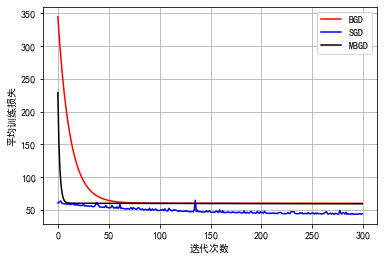

In [14]:
col = ['BGD','SGD','MBGD']
iter = np.arange(iter)
plt.plot(iter,BGD_train_cost,'r-')
plt.plot(iter,SGD_train_cost,'b-')
plt.plot(iter,MBGD_train_cost,'k-')
plt.grid(True)
plt.xlabel('迭代次数')
plt.ylabel('平均训练损失')
plt.legend(labels=col,loc='best')
plt.show()
plt.close()

In [15]:
#保存训练结果
train_cost = [BGD_train_cost,SGD_train_cost,MBGD_train_cost]
train_cost = Merge(train_cost,col)
train_cost.to_csv('./3种梯度下降算法的平均训练损失.csv')
train_cost.describe().to_csv('./3种梯度下降算法的平均训练损失统计.csv')

6.预测

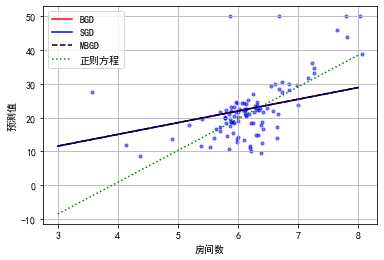

In [16]:
#对随机数据集进行预测
x = np.arange(int(np.min(test_data)),int(np.max(test_data)+1))
x = x.reshape((len(x),1))
BGD = LinearRegression_BGD.test(x)
SGD = LinearRegression_BGD.test(x)
MBGD = LinearRegression_BGD.test(x)
NormalEquation = LinearRegression_NormalEquation.test(x)

#可视化
col = ['BGD','SGD','MBGD','正则方程']
plt.plot(x,BGD,'r-')
plt.plot(x,SGD,'b-')
plt.plot(x,MBGD,'k--')
plt.plot(x,NormalEquation,'g:',)
plt.scatter(test_data,test_result,alpha=0.5,c='b',s=10)
plt.grid(True)
plt.xlabel('房间数')
plt.ylabel('预测值')
plt.legend(labels=col,loc='best')
plt.show()
plt.close()

In [17]:
BGD_predict = LinearRegression_BGD.test(test_data)
SGD_predict = LinearRegression_SGD.test(test_data)
MBGD_predict = LinearRegression_MBGD.test(test_data)
NormalEquation_predict = LinearRegression_NormalEquation.test(test_data)


#保存预测数据
data = [test_data.T.tolist()[0],test_result.T.tolist()[0],BGD_predict,SGD_predict,MBGD_predict,NormalEquation_predict]
col = ['平均房间数','真实房价','BGD预测结果','SGD预测结果','MBGD预测结果','正则方程预测结果']
Data = Merge(data,col)
Data.to_csv('./测试数据与预测结果.csv')

#计算4种算法的均方误差及其统计信息
test_result = test_result.T[0]
BGD_error = ((BGD_predict - test_result) ** 2)
SGD_error = ((SGD_predict - test_result) ** 2)
MBGD_error = ((MBGD_predict - test_result) ** 2)
NormalEquation_error = ((NormalEquation_predict - test_result) ** 2)
error = [BGD_error,SGD_error,MBGD_error,NormalEquation_error]
col = ['BGD','SGD','MBGD','正则方程']
error = Merge(error,col)
error.to_csv('./4种算法的预测均方误差原始数据.csv')
error.describe().to_csv('./4种算法的预测均方误差统计.csv')